In [273]:
# pandas for data pre-processing
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# sklearn for machine learning
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [241]:
# Load data and select relevant columns
columns = ['home_outcome', 'avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win', 'home_ranking', 'away_ranking', 'home_total_wins_so_far', 'home_total_draws_so_far', 'home_total_losses_so_far']
df = pd.read_csv('../data/cleaned-premier-label.csv')
df = df[columns]
df


,home_outcome,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,home_total_wins_so_far,home_total_draws_so_far,home_total_losses_so_far
0,0,7.024,3.303,3.748,20,17,0,0,0
1,1,6.697,4.338,8.967,1,8,0,0,0
2,1,6.842,3.514,4.852,11,19,0,0,0
3,2,7.000,3.207,3.742,14,16,0,0,0
4,2,6.477,3.651,5.318,4,5,0,0,0
...,...,...,...,...,...,...,...,...,...
1241,2,6.619,8.266,8.563,4,19,17,2,0
1242,0,6.563,8.631,8.438,2,18,17,8,9
1243,1,6.204,7.470,6.521,17,16,9,10,14
1244,1,6.153,6.795,3.233,3,8,20,2,11


In [242]:
# See the shape and size 
df.shape

(1246, 9)

In [243]:
# See how it looks (get the first 10 records)
df.sample(10)

,home_outcome,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,home_total_wins_so_far,home_total_draws_so_far,home_total_losses_so_far
253,1,7.042,3.489,5.117,14,13,12,6,9
1227,0,6.369,6.635,2.796,14,18,12,8,12
796,1,5.975,3.101,3.645,20,18,4,3,9
538,2,6.963,4.385,7.343,3,9,8,5,6
989,0,6.913,6.945,2.996,20,7,0,3,1
659,2,5.463,4.107,7.264,1,7,0,0,1
1161,0,6.689,6.855,2.386,11,2,6,6,12
993,0,6.537,6.639,2.632,11,18,2,2,3
558,0,10.019,3.990,2.143,18,5,9,7,5
668,1,9.787,4.632,2.135,13,6,1,1,1


In [244]:
# See how many home results are included and how the records per home_outcome are distributed
# Group by home_outcome attribute
print(df.groupby('home_outcome').size())

home_outcome
0    379
1    322
2    545
dtype: int64


In [245]:
df['home_outcome'].value_counts()

home_outcome
2    545
0    379
1    322
Name: count, dtype: int64

In [246]:
# Have the descriptive statistics calculated for the whole dataset
df.describe()

,home_outcome,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,home_total_wins_so_far,home_total_draws_so_far,home_total_losses_so_far
count,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000
mean,1.133226,7.274838,4.441469,3.684693,11.114767,10.463082,5.401284,4.509631,5.774478
std,0.851120,1.043937,1.647506,1.604586,5.542721,5.693638,4.181174,2.974238,4.374224
min,0.000000,5.463000,2.935000,2.005000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,6.492000,3.250000,2.544750,7.000000,6.000000,2.000000,2.000000,2.000000
50%,1.000000,7.056000,3.535000,3.197000,11.000000,10.000000,5.000000,4.000000,5.000000
75%,2.000000,7.885250,6.383250,4.292000,16.000000,15.000000,8.000000,6.000000,9.000000
max,2.000000,10.355000,9.088000,9.057000,20.000000,20.000000,20.000000,15.000000,21.000000


### Visualize the Dataset Statistics
    1. Draw Box-Whisker Plots
    2. Draw Histograms
    3. Draw Multivariate Plots

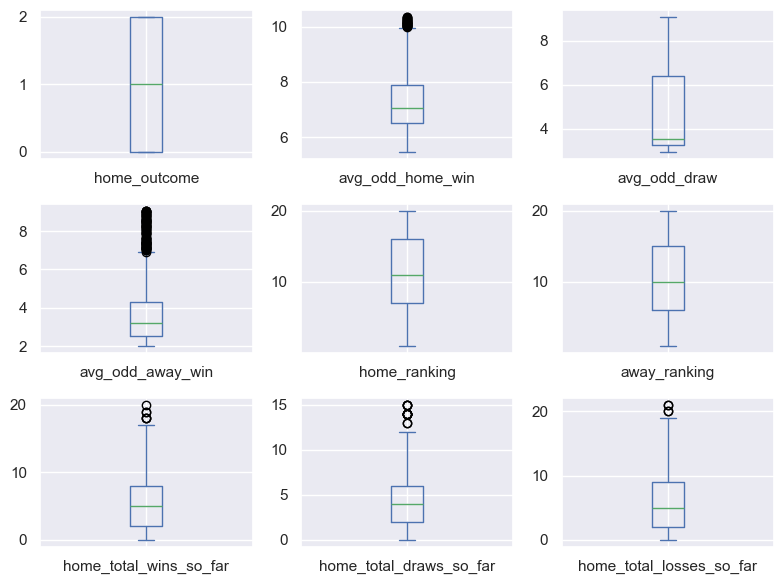

In [267]:
# Draw box-whisker plots
df.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(8, 6))
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


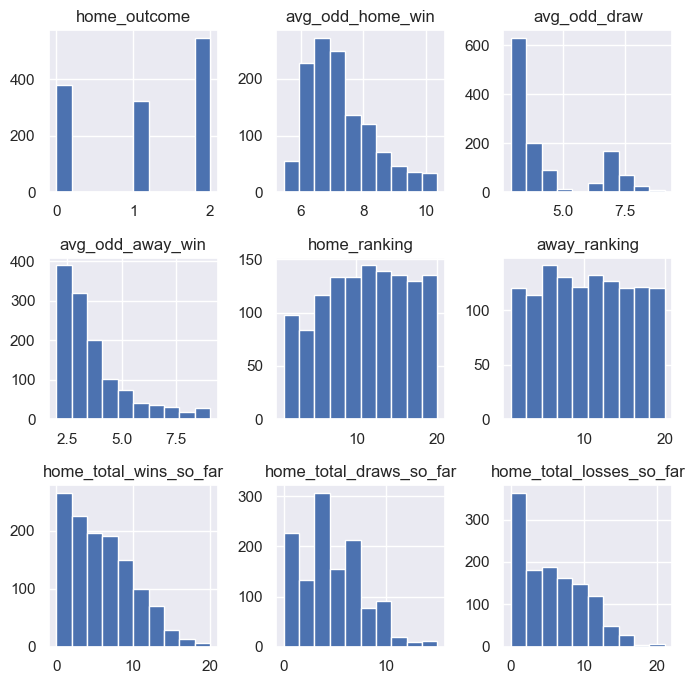

In [270]:
# Draw histograms
df.hist(figsize=(7, 7))  # Change size as needed (width, height)
plt.tight_layout()         # Prevent label/axis overlap
plt.show()


These diagrams show the distribution of the values in the columns. <br>
One of them seem to have Normal (Gaussian) distribution.<br> 

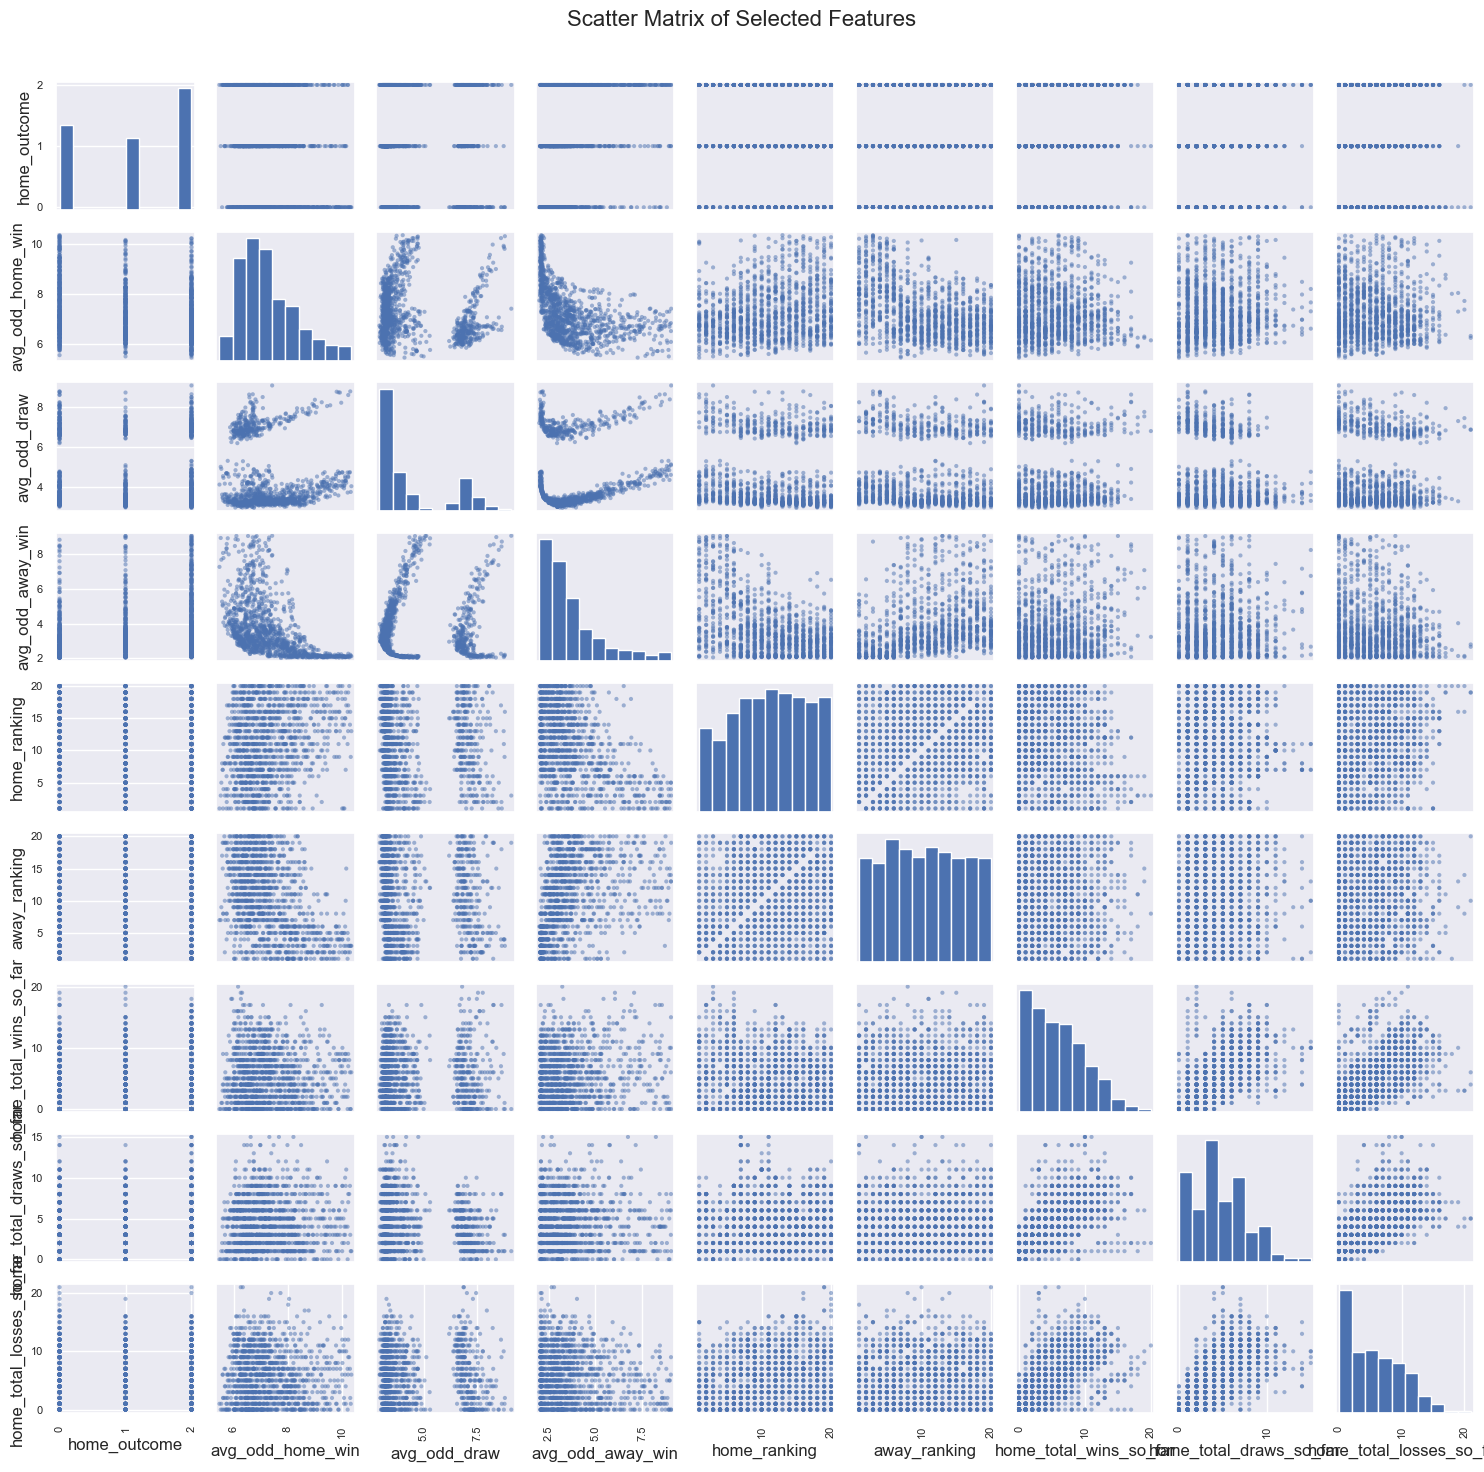

In [271]:
# Draw Multivariate Plots - scatterplots 
# These plots show the observed correlation between the attributes

# Increase figure size to avoid overlapping
scatter_matrix(df, figsize=(15, 15 )) 
plt.suptitle('Scatter Matrix of Selected Features', fontsize=16)
plt.tight_layout()
# Adjust layout to make room for the title
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space at the top (97% of the figure height)
plt.show()

It can be helpful to find out structured relationships between input variables.
Here we can spot some linear relationships.

## Training a model
1. Dividing the dataset into two: training set and test set
2. Implementing Naive Bayes algorithm for training with the training sub-set
3. Estimating how accurate the model is with the test sub-set

#### Explanation:
#### array[:, 1:] → slices all rows, columns from index 1 onward (i.e., columns 1 to 5)

#### array[:, 0] → slices all rows, column 0 only (your target)

In [250]:
# Split the dataset into two: 
#   80% of it as training data
#   20% as a validation dataset

# Convert the dataset into array
array = df.values
# Create two (sub) arrays from it
X = array[:, 1:]   # all columns *except* the first
Y = array[:, 0]    # only the first column (home_outcome)

In [251]:
# Let Python split the set into four, we tell the proportion of splitting
test_set_size = 0.2

# Initial value for randomization
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_set_size, random_state=seed)

In [252]:
print(X_test, Y_test)

[[ 7.811  3.207  2.783 ... 11.     5.     7.   ]
 [ 7.448  7.161  2.206 ...  6.     4.     5.   ]
 [ 9.979  8.221  2.231 ...  6.     5.    14.   ]
 ...
 [ 6.872  3.163  3.035 ...  4.     8.    13.   ]
 [ 7.248  7.278  2.179 ...  7.     1.     2.   ]
 [ 8.415  3.478  2.245 ...  6.     6.    12.   ]] [2. 0. 0. 2. 2. 1. 2. 2. 0. 0. 1. 2. 1. 1. 0. 2. 0. 2. 0. 1. 0. 2. 1. 2.
 2. 0. 0. 0. 1. 2. 1. 1. 0. 2. 1. 1. 1. 0. 1. 2. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 2. 1. 1. 1. 2. 0. 2. 2. 2. 0. 2. 0. 2. 0. 2. 2. 1. 2. 2. 1. 2.
 0. 2. 0. 2. 2. 2. 0. 2. 1. 2. 1. 2. 2. 2. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0.
 2. 2. 0. 2. 2. 1. 2. 2. 1. 1. 2. 1. 2. 1. 0. 2. 1. 0. 2. 0. 1. 1. 1. 1.
 0. 1. 0. 2. 2. 2. 0. 0. 0. 0. 2. 2. 0. 2. 2. 0. 1. 1. 0. 0. 1. 2. 1. 2.
 0. 1. 0. 2. 2. 0. 2. 0. 2. 1. 0. 1. 2. 1. 2. 2. 1. 1. 1. 0. 1. 0. 2. 2.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 2. 1. 2. 0. 2. 0. 2. 2. 0. 0. 2. 2. 2.
 0. 2. 0. 1. 2. 2. 0. 1. 2. 2. 0. 2. 2. 2. 2. 0. 1. 2. 2. 1. 0. 2. 1. 1.
 0. 2. 0. 1. 1. 1. 0. 0. 2. 2. 2. 1. 0. 1. 

Now we have training data X_train and Y_train 
and validation data X_test and Y_test 

We are ready to apply algorithms for training a model from our data.
We try Gaussian Naive Bayes, as it is appropriate for analysis of numeric data.

In [253]:
# build the model from the train
model = GaussianNB()

In [254]:
model.fit(X_train, Y_train)

GaussianNB()

In [255]:
# test the model on the test set
model.score(X_test, Y_test)

0.464

In [256]:
model.score(X_train, Y_train)

0.5200803212851406

Now we can try the model on our validation set.

## Validating the Model

In [257]:
X_test

array([[ 7.811,  3.207,  2.783, ..., 11.   ,  5.   ,  7.   ],
       [ 7.448,  7.161,  2.206, ...,  6.   ,  4.   ,  5.   ],
       [ 9.979,  8.221,  2.231, ...,  6.   ,  5.   , 14.   ],
       ...,
       [ 6.872,  3.163,  3.035, ...,  4.   ,  8.   , 13.   ],
       [ 7.248,  7.278,  2.179, ...,  7.   ,  1.   ,  2.   ],
       [ 8.415,  3.478,  2.245, ...,  6.   ,  6.   , 12.   ]])

In [258]:
# Test on the test data, try prediction
predicted = model.predict(X_test)

In [259]:
predicted.shape

(250,)

In [260]:
predicted

array([0., 0., 0., 1., 2., 0., 2., 0., 0., 0., 1., 2., 0., 2., 0., 2., 0.,
       0., 2., 2., 2., 0., 2., 0., 2., 0., 0., 0., 2., 1., 2., 2., 2., 2.,
       0., 0., 0., 2., 0., 2., 2., 0., 0., 0., 2., 2., 2., 2., 2., 0., 0.,
       2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 0., 0.,
       2., 0., 0., 2., 2., 0., 0., 2., 2., 2., 0., 1., 0., 0., 0., 2., 2.,
       2., 0., 0., 2., 2., 2., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0.,
       1., 2., 0., 2., 2., 2., 2., 2., 0., 1., 2., 2., 0., 0., 2., 2., 0.,
       0., 0., 0., 0., 2., 2., 2., 2., 0., 0., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 2., 0., 0., 0., 0., 2., 1., 0., 2., 0., 2., 0., 0., 0., 2.,
       2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 0., 2., 2., 0.,
       1., 1., 0., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2.,
       0., 2., 2., 2., 0., 0., 2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 2.,
       0., 1., 2., 0., 1., 2., 2., 2., 0., 2., 0., 2., 2., 2., 0., 1., 2.,
       2., 2., 0., 2., 0.

In [261]:
Y_test

array([2., 0., 0., 2., 2., 1., 2., 2., 0., 0., 1., 2., 1., 1., 0., 2., 0.,
       2., 0., 1., 0., 2., 1., 2., 2., 0., 0., 0., 1., 2., 1., 1., 0., 2.,
       1., 1., 1., 0., 1., 2., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       2., 1., 1., 1., 2., 0., 2., 2., 2., 0., 2., 0., 2., 0., 2., 2., 1.,
       2., 2., 1., 2., 0., 2., 0., 2., 2., 2., 0., 2., 1., 2., 1., 2., 2.,
       2., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 2., 2., 0., 2., 2., 1.,
       2., 2., 1., 1., 2., 1., 2., 1., 0., 2., 1., 0., 2., 0., 1., 1., 1.,
       1., 0., 1., 0., 2., 2., 2., 0., 0., 0., 0., 2., 2., 0., 2., 2., 0.,
       1., 1., 0., 0., 1., 2., 1., 2., 0., 1., 0., 2., 2., 0., 2., 0., 2.,
       1., 0., 1., 2., 1., 2., 2., 1., 1., 1., 0., 1., 0., 2., 2., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 2., 1., 2., 0., 2., 0., 2., 2.,
       0., 0., 2., 2., 2., 0., 2., 0., 1., 2., 2., 0., 1., 2., 2., 0., 2.,
       2., 2., 2., 0., 1., 2., 2., 1., 0., 2., 1., 1., 0., 2., 0., 1., 1.,
       1., 0., 0., 2., 2.

### Estimating the Accuracy

We need a metrics for the evaluation. <br>
The ‘accuracy‘ is the percentage [%] of correctly predicted instances from the total number of instances in the dataset.

In [262]:
# Set the metrics
scoring = 'accuracy'

In [263]:
# Calculated accuracy of the model over the validation set
print(accuracy_score(Y_test, predicted))

0.464


#### Confusion Matrix

Confusion matrix provides an indication of the __three types of predictions__: 
- correct 
- false positive
- false negative.

There are four coeficients, calculated out of these types:
Precission, Recall, Accuracy, and F1 - a harmonic mean of Precission and Recall.


Train Accuracy: 0.52
Test Accuracy: 0.46

Accuracy Score: 0.464

Confusion Matrix:
[[42  4 31]
 [30  4 42]
 [21  6 70]]


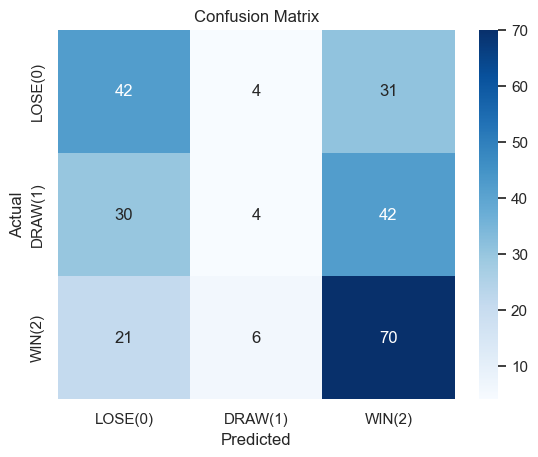


Classifier performance on training dataset:

              precision    recall  f1-score   support

     LOSE(0)       0.48      0.53      0.51       302
     DRAW(1)       0.39      0.11      0.18       246
      WIN(2)       0.56      0.73      0.63       448

    accuracy                           0.52       996
   macro avg       0.48      0.46      0.44       996
weighted avg       0.49      0.52      0.48       996


Classifier performance on test dataset:

              precision    recall  f1-score   support

     LOSE(0)       0.45      0.55      0.49        77
     DRAW(1)       0.29      0.05      0.09        76
      WIN(2)       0.49      0.72      0.58        97

    accuracy                           0.46       250
   macro avg       0.41      0.44      0.39       250
weighted avg       0.42      0.46      0.41       250



In [264]:

# Evaluate model
train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)

print(f"\nTrain Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predictions
predicted = model.predict(X_test)

# Accuracy
print("\nAccuracy Score:", accuracy_score(Y_test, predicted))

# Confusion matrix
cmat = confusion_matrix(Y_test, predicted)
home_outcome_names = ['LOSE(0)', 'DRAW(1)', 'WIN(2)']

print("\nConfusion Matrix:")
print(cmat)

# Confusion matrix heatmap
sns.set()
sns.heatmap(cmat, annot=True, cmap="Blues", fmt='d',
            xticklabels=home_outcome_names, yticklabels=home_outcome_names)
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification report provides a breakdown of each home_outcome by precision, recall, f1-score and support
print("\nClassifier performance on training dataset:\n")
print(classification_report(Y_train, model.predict(X_train), target_names=home_outcome_names))

print("\nClassifier performance on test dataset:\n")
print(classification_report(Y_test, predicted, target_names=home_outcome_names))

In [265]:
Y_test

array([2., 0., 0., 2., 2., 1., 2., 2., 0., 0., 1., 2., 1., 1., 0., 2., 0.,
       2., 0., 1., 0., 2., 1., 2., 2., 0., 0., 0., 1., 2., 1., 1., 0., 2.,
       1., 1., 1., 0., 1., 2., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       2., 1., 1., 1., 2., 0., 2., 2., 2., 0., 2., 0., 2., 0., 2., 2., 1.,
       2., 2., 1., 2., 0., 2., 0., 2., 2., 2., 0., 2., 1., 2., 1., 2., 2.,
       2., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 2., 2., 0., 2., 2., 1.,
       2., 2., 1., 1., 2., 1., 2., 1., 0., 2., 1., 0., 2., 0., 1., 1., 1.,
       1., 0., 1., 0., 2., 2., 2., 0., 0., 0., 0., 2., 2., 0., 2., 2., 0.,
       1., 1., 0., 0., 1., 2., 1., 2., 0., 1., 0., 2., 2., 0., 2., 0., 2.,
       1., 0., 1., 2., 1., 2., 2., 1., 1., 1., 0., 1., 0., 2., 2., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 2., 1., 2., 0., 2., 0., 2., 2.,
       0., 0., 2., 2., 2., 0., 2., 0., 1., 2., 2., 0., 1., 2., 2., 0., 2.,
       2., 2., 2., 0., 1., 2., 2., 1., 0., 2., 1., 1., 0., 2., 0., 1., 1.,
       1., 0., 0., 2., 2.

### Validation with Random Data Samples

In [266]:
# Format:
# [avg_odd_home_win, avg_odd_draw, avg_odd_away_win,
#  home_ranking, away_ranking,
#  home_total_wins_so_far, home_total_draws_so_far, home_total_losses_so_far]

# Example 1: strong home team, weak away team
k = [[2.20, 3.50, 7.00, 1, 20, 22, 5, 1]]

# Example 2: fairly even match
m = [[2.90, 3.10, 2.95, 8, 9, 11, 8, 9]]

# Example 3: weak home team, strong away team
n = [[6.70, 3.30, 1.80, 18, 3, 4, 6, 15]]

# Predict and print results
my_prediction = model.predict(k)
print("Prediction for k:", my_prediction)

my_prediction = model.predict(m)
print("Prediction for m:", my_prediction)

my_prediction = model.predict(n)
print("Prediction for n:", my_prediction)


Prediction for k: [2.]
Prediction for m: [0.]
Prediction for n: [0.]


In [274]:
model_file = '../data/naive-bayes-model.pkl'

joblib.dump(model, model_file)

['../data/naive-bayes-model.pkl']

In [ ]:
load_model = joblib.load(model_file)
y_predict = load_model.predict(X_test)

Gaussian Naive Bayes makes strong assumptions about normal distribution and feature independence.

My Naive Bayes model predicts WIN and LOSE correctly, but misclassifies the DRAW case as a LOSE. That’s not uncommon for Naive Bayes, especially when:

The features for draws overlap heavily with wins/losses.

Class 1 (draw) has fewer clear patterns or examples compared to 0 or 2.

The features (odds, rankings) don’t allow easy separation of draws in the Gaussian distribution model.

